### Imports

In [154]:
from IPython.display import display
import numpy as np
import pandas as pd
import scipy as scp 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
import math

Load points

In [155]:
file = '../../data/points.txt'
columns = ['x', 'y']
data_pd = pd.read_csv(file, names=columns, header=None, delim_whitespace=True)
data_np = data_pd.to_numpy()
x = data_pd.x
y = data_pd.y

### Task 1 - Programming - Bayesian Regression
Implement the Bayesian Regression approach for 1D data using the data provided in points.txt.

##### a - Estimate $w_0, w_1$ by Bayesian estimation

In [156]:
a = 2
b = 25
I =  np.identity(2) 
#X = np.random.multivariate_normal(0, (1/a)*I)
X = np.c_[np.ones(len(x)), x]
sum_n = (a*I + b*np.dot(X.T, X))**(-1)
u_n = b*np.dot(np.dot(sum_n, X.T), y)
w = np.random.multivariate_normal(u_n, b*sum_n).T
print("w0, w1", w)

w0, w1 [-1.4385239   0.58403945]


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_51454/867996271.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  w = np.random.multivariate_normal(u_n, b*sum_n).T


##### b - Create 10 different estimates for lines from (b) by sampling w to predict y_n. From these different lines, estimate the average line

In [157]:
#10 different estimates
lines = []
for i in range(10):
    w = np.random.multivariate_normal(u_n, b*sum_n).T
    line = w[0] + w[1] * x
    lines.append(line)

line = []
l = len(lines[0])
for i in range(l):
    avg = sum([x[i] for x in lines])/l
    line.append(avg)

print("average line: ", line)
print(len(line))

average line:  [-1.148850443539652, -0.907800815784495, -0.880339465787072, -0.828468026903051, -0.7918528935731539, -0.7765965880190299, -0.7369301935783078, -0.6881100158051116, -0.6759049713618124, -0.6545461435860391, -1.0878252213231565, -0.9444159491143923, -0.9688260380009904, -0.950518471336042, -0.9169545991169693, -0.9383134268927428, -0.801006676905628, -0.9016982935628455, -0.8955957713411961, -0.8925445102303712]
20


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_51454/1699572173.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  w = np.random.multivariate_normal(u_n, b*sum_n).T


##### c - Approximate the true datapoints $(x_n, y_n)$ by comuting $\^{y}_n$ = \^{h}(x_n)

In [158]:
#given the function of the average line above - give x to compute y
y_hat1 = line

##### d - Compute the correlation between true y and estimated \^{y} predictions

In [159]:
def Cov(x, y):
    length = len(x)
    E_xy = sum([(x*y) for (x, y) in zip(x, y)])/length #mean of products
    E_x = sum(x)/length #mean
    E_y = sum(y)/length #mean
    return E_xy - (E_x*E_y)

def Corr(x, y):
    cov_xy = Cov(x, y)
    sig_y1 = math.sqrt(Cov(x, x))
    sig_y2 = math.sqrt(Cov(y, y))
    return cov_xy/(sig_y1*sig_y2)

corr1 = Corr(y, y_hat1)
print("correlation: ", corr1)

correlation:  0.9398331948694636


### Task 2 - Programming - Nonparametric Regression
Implement 1D nonparametric regression using the kernel smoother

##### a - Implement the following function where $\phi(x) = \mathcal{N}(0,1)$:
$$
\^{g}(x) = \frac{\sum_{n=1}^N\phi(\frac{x-x_n}{h})y_n}{\sum_{n=1}^N\phi(\frac{x-x_n}{h})}
$$

In [160]:
#define g(x)
def g(x):
    h = 0.00000000000000001
    numerator = 0
    denominator = 0.00000000001
    for point in data_np:
        phi_x = 1 if ((x-point[0])/h) < 1 else 0
        numerator += phi_x*point[1]
        denominator += phi_x
    return numerator / denominator
    #return sum([1*point[1] if (x-point[0])/h < 1 else 0 for point in data_np]) / (sum([1 if (x-xn)/h < 1 else 0 for xn in data_pd.x])+0.00000000001)

##### b - Approximate the true datapoints($x_n, y_n$) by computing $\^{y}_n = \^{g}(x_n)$

In [161]:
y_hat2 = [g(x) for x in data_pd.x]

##### c - Compute the correlation between true y and estimated outputs $\^{y}$

In [162]:
corr2 = Corr(y, y_hat2)
print("correlation: ", corr2)
#print("correct answer: ", np.corrcoef(data_pd.y, list_y_hat))


correlation:  0.9465858524157807


### Task 3 - Comparison

##### a - Repetition: estimate $w_0, w_1$ by the standard least square estimate

In [163]:
def get_w(X, y):
    Xt = X.T
    return np.linalg.inv(Xt@X)@Xt@y

X = np.c_[np.ones(len(x)), x]
w = get_w(X,y)
print("W: ", w)

W:  [0.0978664  0.95079049]


##### b - Approximate the true datapoints($x_n, y_n$) by computing $\^{y}_n$

In [164]:
y_hat3 = w[0] + x*w[1]

##### c - Compute the correlation between true y and estimated $\^{y}$ predictions

In [165]:
corr3 = Corr(data_pd.y, y_hat3)
print("correlation: ", corr3)

correlation:  0.939833194869459


##### d - Compare correlation coefficients between the different models. Which is best based on that metric?

In [166]:
print(corr1)
print(corr2)
print(corr3)

0.9398331948694636
0.9465858524157807
0.939833194869459


Task 2 with nonparametric regression seems to be the clossest.

### Task 4 - Programming Exercise - Classification
Iris data of 150 samples in 4D with three classes
##### a - Read the data and the labels, and plot the data - each class has 50 samples

In [167]:
iris_file = '../../data/iris.csv'
iris_columns = ["x","y","z","w","c"]
iris_data_pd = pd.read_csv(iris_file, names=iris_columns, header=None, sep=',')
iris_data_np = iris_data_pd.to_numpy()

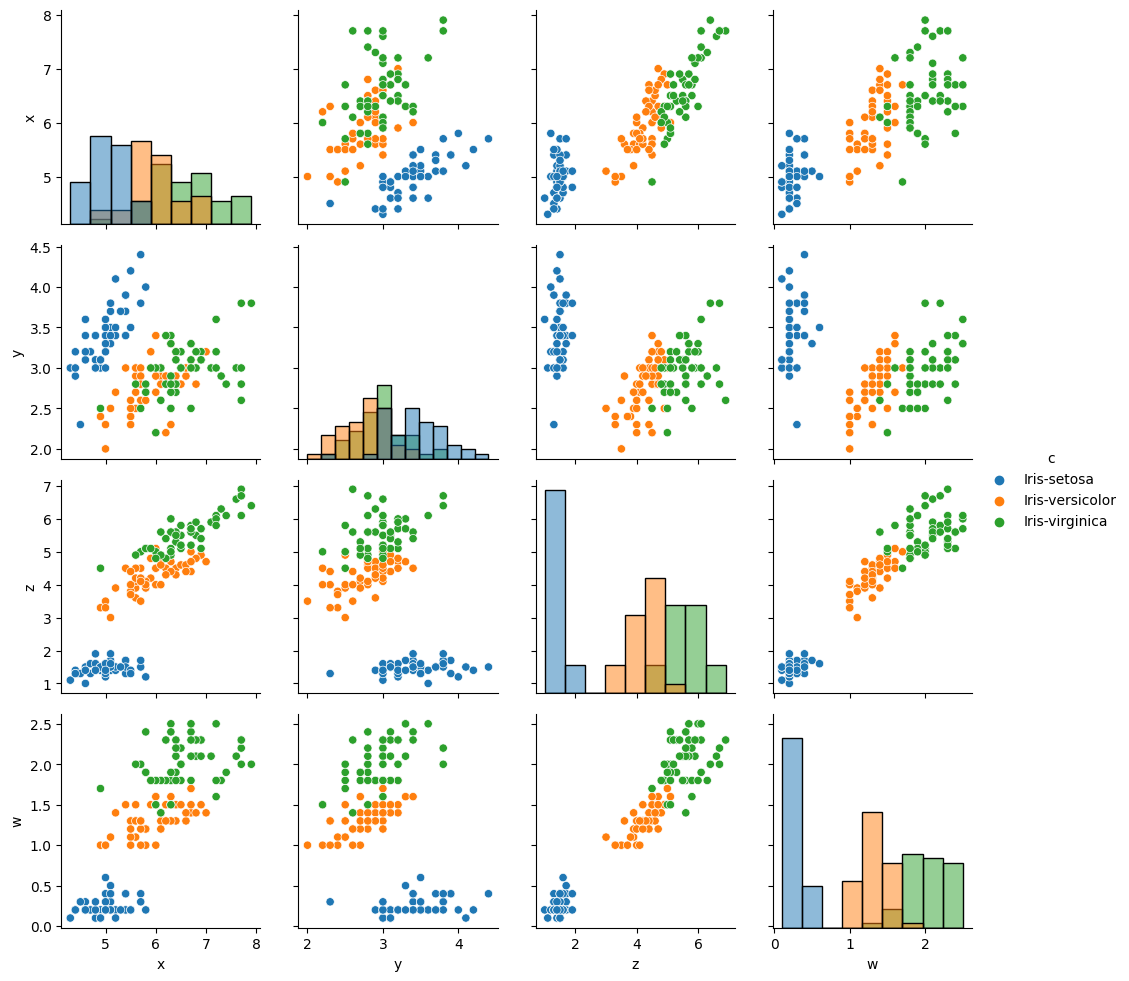

In [168]:
g = sns.PairGrid(iris_data_pd, hue='c')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

It's imidiatly obvious W and Y seems good at separating the data where as x and y has a lot of overlap between the classes.

##### b - For each class, compute the sample mean $\^{\mu}_k \in R^4, k = 1, ..., 3$
$$
\^{\mu}_k = \frac{1}{N_k} \sum_{x_n \in C_k} x_n
$$
where $N_k$ = 50 is the number of samples for each class

In [175]:
#manual
total = 0
for row in iris_data_pd.loc[iris_data_pd['c'] == 'Iris-setosa'].iterrows():
    total+= row[1][0:4]
print(total/50)

#for all
sample_mean = iris_data_pd.groupby('c').mean()
print(sample_mean)

x    5.006
y    3.418
z    1.464
w    0.244
Name: 0, dtype: object
                     x      y      z      w
c                                          
Iris-setosa      5.006  3.418  1.464  0.244
Iris-versicolor  5.936  2.770  4.260  1.326
Iris-virginica   6.588  2.974  5.552  2.026


##### c - for each class, compute the sample covariance matrix $\^{\sum_k} \in R^{4x4}, k = 1,...,3$
$$
\^{\sum_k} = \frac{1}{N_k} \sum_{x_n \in C_k} (x_n-\^{\mu}_k)(x_n - \^{\mu}_k)^T
$$

In [176]:
def get_covariance_matrix(c): #get covariance matrix from class
    print("class: ", c[0])
    mean_vec = c[1].values
    print("mean: ", mean_vec)
    cov_mat = 0
    for row in iris_data_pd.loc[iris_data_pd['c'] == c[0]].iterrows(): #only get intries from this class
        vec_diff = np.array([row[1][0:4] - mean_vec]).T
        cov_mat += np.dot(vec_diff, vec_diff.T)
    cov_mat /= 50
    print("covariance: ", cov_mat)
    print()
    return cov_mat 

cov_mats = []
for c in sample_mean.iterrows(): #iter each class
    cov_mats.append(get_covariance_matrix(c))


class:  Iris-setosa
mean:  [5.006 3.418 1.464 0.244]
covariance:  [[0.12176400000000001 0.09829199999999999 0.015816 0.010335999999999998]
 [0.09829199999999999 0.14227600000000007 0.011447999999999991
  0.011208000000000003]
 [0.015816 0.011447999999999991 0.02950400000000001 0.005584000000000002]
 [0.010335999999999998 0.011208000000000003 0.005584000000000002
  0.011264000000000005]]

class:  Iris-versicolor
mean:  [5.936 2.77  4.26  1.326]
covariance:  [[0.2611040000000001 0.08347999999999998 0.1792400000000001
  0.05466400000000001]
 [0.08347999999999998 0.09650000000000007 0.081 0.04038000000000001]
 [0.1792400000000001 0.081 0.21640000000000012 0.07164]
 [0.05466400000000001 0.04038000000000001 0.07164 0.03832399999999998]]

class:  Iris-virginica
mean:  [6.588 2.974 5.552 2.026]
covariance:  [[0.3962560000000002 0.09188800000000001 0.297224 0.04811200000000002]
 [0.09188800000000001 0.10192400000000007 0.06995200000000001
  0.04667600000000001]
 [0.297224 0.06995200000000001 0.

##### d - Compute the joint covariance matrix
$$
\^{\sum} = \sum_{k=1}^K \frac{N_k}{N}\^{\sum}_k
$$
where N_k defines the number of samples of class k, and N = 150 refers to the number of samples.

In [171]:
joint_covariance = 0
for cov in cov_mats:
    joint_covariance += 50/150 * cov
print(joint_covariance)

[[0.2597080000000001 0.09122 0.16409333333333337 0.03770400000000001]
 [0.09122 0.11356666666666673 0.05413333333333333 0.03275466666666667]
 [0.16409333333333337 0.05413333333333333 0.18146666666666672
  0.04169066666666667]
 [0.03770400000000001 0.03275466666666667 0.04169066666666667
  0.041170666666666654]]


##### e - Compute the three class-specific discriminant functions
$$
a_k(x) = w_k^Tx + w_{k0},
$$
using the previous results from task (b), and task (d), by
$$
w_k = \^{\sum}^{-1}\^{\mu}_k
$$
$$
w_{k0} = \frac{1}{2} \^{\mu}_k^T\^{\sum}^{-1}\^{\mu}_k + ln(P(C_k))
$$
where $P(C_k) = \frac{N_k}{N}$

In [172]:
def get_discriminant_func(c):
    mu_k = c[1][0:4]
    w_k = np.dot(joint_covariance**(-1), mu_k)
    w_k0 = 0.5 * np.dot(np.dot(mu_k.T, joint_covariance**(-1)), mu_k) + np.log(50/150)
    return lambda x : np.dot(w_k.T, x) + w_k0

a_func = []
for c in sample_mean.iterrows():
    a_func.append(get_discriminant_func(c))

##### f - Assume each class is defined by a 4D Gaussian distribution $N(\^{\mu}_k, \^{\sum})$. Get two new samples $x_m^{(k)} \in R^4, m = 1,2$ for each class k.

In [181]:
def get_sample(mu_k, joint_covariance):
    return np.random.multivariate_normal(mu_k, joint_covariance)

samples = []
classes = []
for c in sample_mean.iterrows():
    classes.append(c[0])
    mu_k = c[1][0:4]
    print('class: ', c[0])
    list = []
    for i in range(1,3):
        m = get_sample(mu_k, joint_covariance)
        list.append(m)
        print('m' + str(i) + ": " + str(m))
    samples.append(list)
    print()

class:  Iris-setosa
m1: [5.93614305 3.95873005 1.89485098 0.58962932]
m2: [5.8400418  3.81419078 2.08221201 0.65302536]

class:  Iris-versicolor
m1: [5.9678706  2.41199767 4.26885195 1.18647462]
m2: [6.92455943 3.34883167 4.93038255 1.53336308]

class:  Iris-virginica
m1: [7.23031583 3.05131132 5.88231257 2.20464826]
m2: [6.90070663 3.24453606 5.54585809 2.033663  ]



##### g - Classify the new samples from the previous step (f) using the discriminant functions in step (e). This is done by computing $a_1(x_m^{(k)}), a_2(x_m^{(k)})$, and $a_3(x_m^{(k)})$. Then assign the class j by j = $argmax_ka_k.$ Are the new samples $x_m$ from step (f) correctly classified? If not which classes are confused with one-another?


In [174]:
for i in range(3):
    for j in range(len(samples[i])):
        a1 = a_func[0](samples[i][j])
        a2 = a_func[1](samples[i][j])
        a3 = a_func[2](samples[i][j])
        predicted = ''
        if a1 > a2:
            if a1 > a3:
                predicted = 'Iris-setosa'
            else:
                predicted = 'Iris-virginica'
        else: 
            if a2 > a3:
                predicted = 'Iris-versicolor'
            else:
                predicted = 'Iris-virginica'
        print('predicted: ', predicted)
        print('correct: ', classes[i])
        print()

predicted:  Iris-virginica
correct:  Iris-setosa

predicted:  Iris-virginica
correct:  Iris-setosa

predicted:  Iris-virginica
correct:  Iris-versicolor

predicted:  Iris-virginica
correct:  Iris-versicolor

predicted:  Iris-virginica
correct:  Iris-virginica

predicted:  Iris-virginica
correct:  Iris-virginica



It seems like we predict Iris-virginica every time...

### Task 5 Theory
95% of the data is class 1 and 5% is class 2. By choosing class 1 each time, it's right 95% of the time.

The precision (PPV - positive predicted value) would indicate the amount of positive classified class 1, which are actually belonging to class 1. 
$$
PPV = \frac{TP}{TP+FP} = \frac{95}{95+5} = 95\%
$$

The FPR could also be used on class 2, to show that we always predict wrong for class 2:
$$
FPR = \frac{FP}{FP+TN} = \frac{5}{5+0} = 100\%
$$

Recall (TPR) cannot be used here, as it would just give us 100% as there are no true negatives